# Interpolasi Lagrange dan Newton

**Annas Tri Widagdo (21120122140112)**      
**Course: Metode Numerik - (Kelas D)**      
**Department of Computer Engineering**      
**Diponegoro University**        

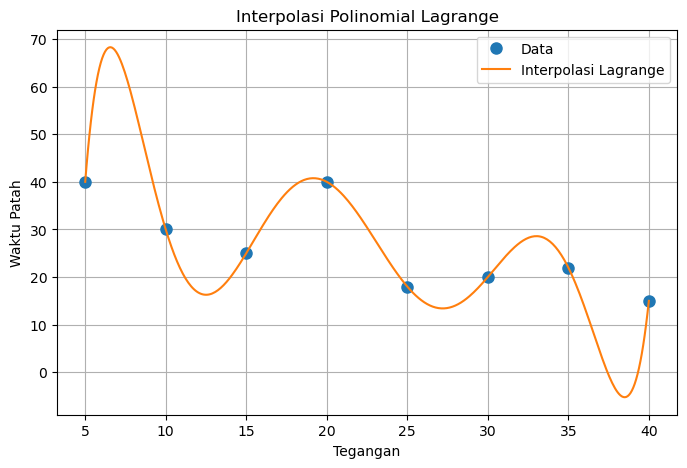

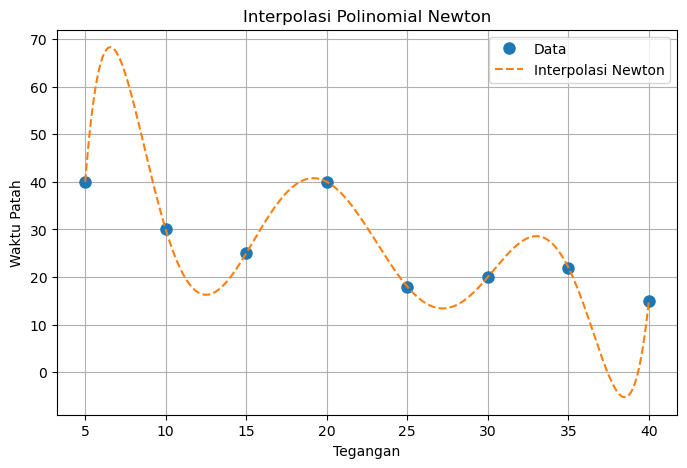

In [4]:
# import library yang diperlukan 
import numpy as np
import matplotlib.pyplot as plt

# Dataset
tegangan = np.array([5, 10, 15, 20, 25, 30, 35, 40])
waktu_patah = np.array([40, 30, 25, 40, 18, 20, 22, 15])

# Fungsi untuk interpolasi polinomial Lagrange
def lagrange_interpolation(x, x_points, y_points):
    def basis(j):
        p = [(x - x_points[m])/(x_points[j] - x_points[m]) for m in range(k) if m != j]
        return np.prod(p, axis=0) * y_points[j]

    k = len(x_points)
    return np.sum([basis(j) for j in range(k)], axis=0)

# Fungsi untuk interpolasi polinomial Newton
def newton_interpolation(x, x_points, y_points):
    def divided_diff(x_points, y_points):
        n = len(y_points)
        coef = np.zeros([n, n])
        coef[:,0] = y_points
        for j in range(1,n):
            for i in range(n-j):
                coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x_points[i+j] - x_points[i])
        return coef[0, :]

    def newton_poly(x, x_points, coef):
        n = len(x_points) - 1
        p = coef[n]
        for k in range(1, n + 1):
            p = coef[n - k] + (x - x_points[n - k]) * p
        return p

    coef = divided_diff(x_points, y_points)
    return newton_poly(x, x_points, coef)

# Rentang x untuk plot
x_range = np.linspace(5, 40, 400)

# Interpolasi dengan metode Lagrange dan Newton
y_lagrange = lagrange_interpolation(x_range, tegangan, waktu_patah)
y_newton = newton_interpolation(x_range, tegangan, waktu_patah)

# Plot hasil interpolasi Lagrange
plt.figure(figsize=(8, 5))
plt.plot(tegangan, waktu_patah, 'o', label='Data', markersize=8)
plt.plot(x_range, y_lagrange, label='Interpolasi Lagrange')
plt.xlabel('Tegangan')
plt.ylabel('Waktu Patah')
plt.title('Interpolasi Polinomial Lagrange')
plt.legend()
plt.grid(True)
plt.show()

# Plot hasil interpolasi Newton
plt.figure(figsize=(8, 5))
plt.plot(tegangan, waktu_patah, 'o', label='Data', markersize=8)
plt.plot(x_range, y_newton, '--', label='Interpolasi Newton')
plt.xlabel('Tegangan')
plt.ylabel('Waktu Patah')
plt.title('Interpolasi Polinomial Newton')
plt.legend()
plt.grid(True)
plt.show()